# Loading and Exploring the Data

In [420]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df = pd.read_csv('//Users/avonleafisher/Desktop/manhattan.csv')

In [311]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [313]:
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [314]:
df.borough.unique()

array(['Manhattan'], dtype=object)

In [315]:
df.drop('borough', axis=1, inplace=True)
df.drop('rental_id', axis=1, inplace=True)

In [316]:
df.isna().sum()

rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
dtype: int64

In [317]:
df.neighborhood.unique()

array(['Upper East Side', 'Greenwich Village', 'Midtown', 'Soho',
       'Central Harlem', 'Midtown East', 'Battery Park City', 'Flatiron',
       'East Village', 'Midtown West', 'Upper West Side',
       'Lower East Side', 'Tribeca', 'Gramercy Park', 'East Harlem',
       'West Village', 'Central Park South', 'Chelsea',
       'Financial District', 'Inwood', 'Midtown South',
       'Washington Heights', 'Chinatown', 'Roosevelt Island',
       'Hamilton Heights', 'Stuyvesant Town/PCV', 'Morningside Heights',
       'Little Italy', 'Nolita', 'West Harlem', 'Long Island City',
       'Manhattanville'], dtype=object)

In [318]:
df.rent.describe()

count     3539.000000
mean      5138.940379
std       3162.824760
min       1300.000000
25%       3150.000000
50%       4000.000000
75%       6000.000000
max      20000.000000
Name: rent, dtype: float64

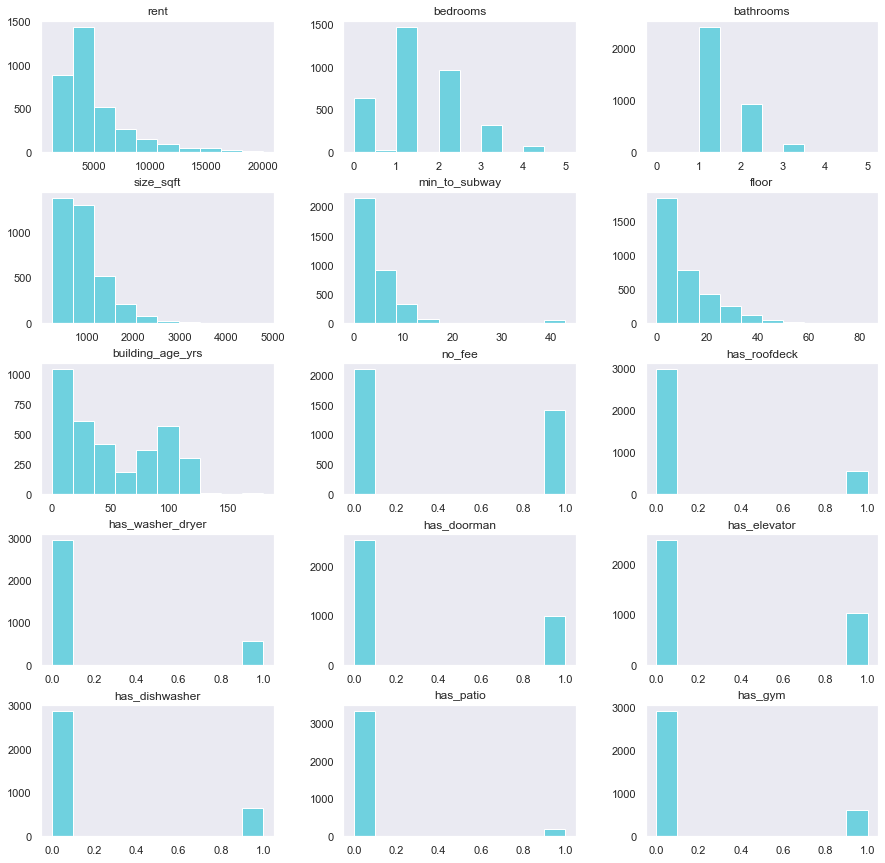

In [319]:
df.hist(grid=False, figsize=(15,15), layout=(5,3), color='#6FD1DF');

In [320]:
keys = list(df.neighborhood.value_counts().keys())
vals = list(df.neighborhood.value_counts())

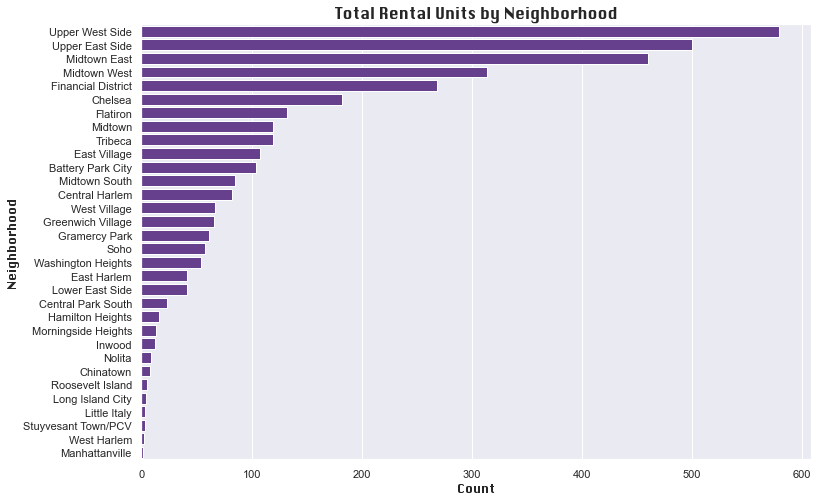

In [321]:
sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Total Rental Units by Neighborhood', 
             fontname='silom', fontsize=15)

ax.set_xlabel('Count', 
             fontname='silom', fontsize=12)

ax.set_ylabel('Neighborhood', 
             fontname='silom', fontsize=12)

sns.barplot(x=vals, y=keys,
            color="rebeccapurple");

In [349]:
avg_rents = df.groupby('neighborhood').mean().reset_index()[['neighborhood', 'rent']]
avg_rents['rent'] = [round(r) for r in avg_rents.rent] 
avg_rents.sort_values(by=['rent'], ascending=False, inplace=True)

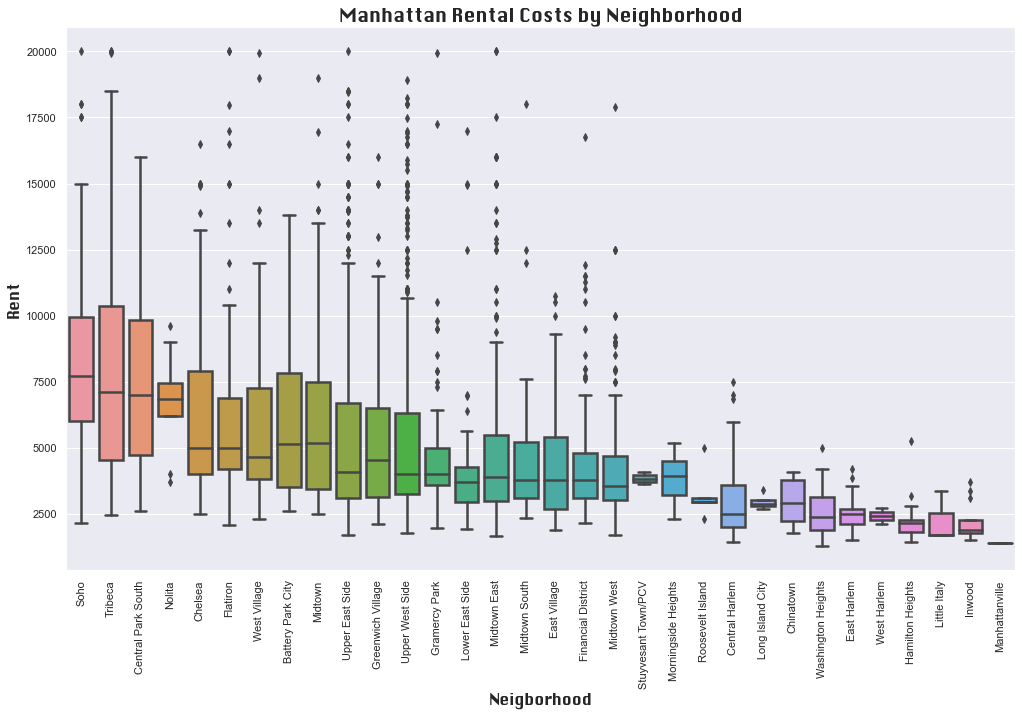

In [381]:
order = list(avg_rents.neighborhood)
plt.figure(figsize=((17, 10)))
ax = sns.boxplot(x="neighborhood", y="rent",
                 data=df, linewidth=2.5, 
                 order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel("Neigborhood", size=15, fontname='silom')
plt.ylabel("Rent", size=15, fontname='silom')
plt.title("Manhattan Rental Costs by Neighborhood", size=18, fontname='silom');

# Checking Regression Assumptions

## Linearity 

In [296]:
neighborhood_dummies = pd.get_dummies(df.neighborhood).drop('Manhattanville', axis=1)
df = pd.concat([df, neighborhood_dummies], axis=1).drop('neighborhood', axis=1)

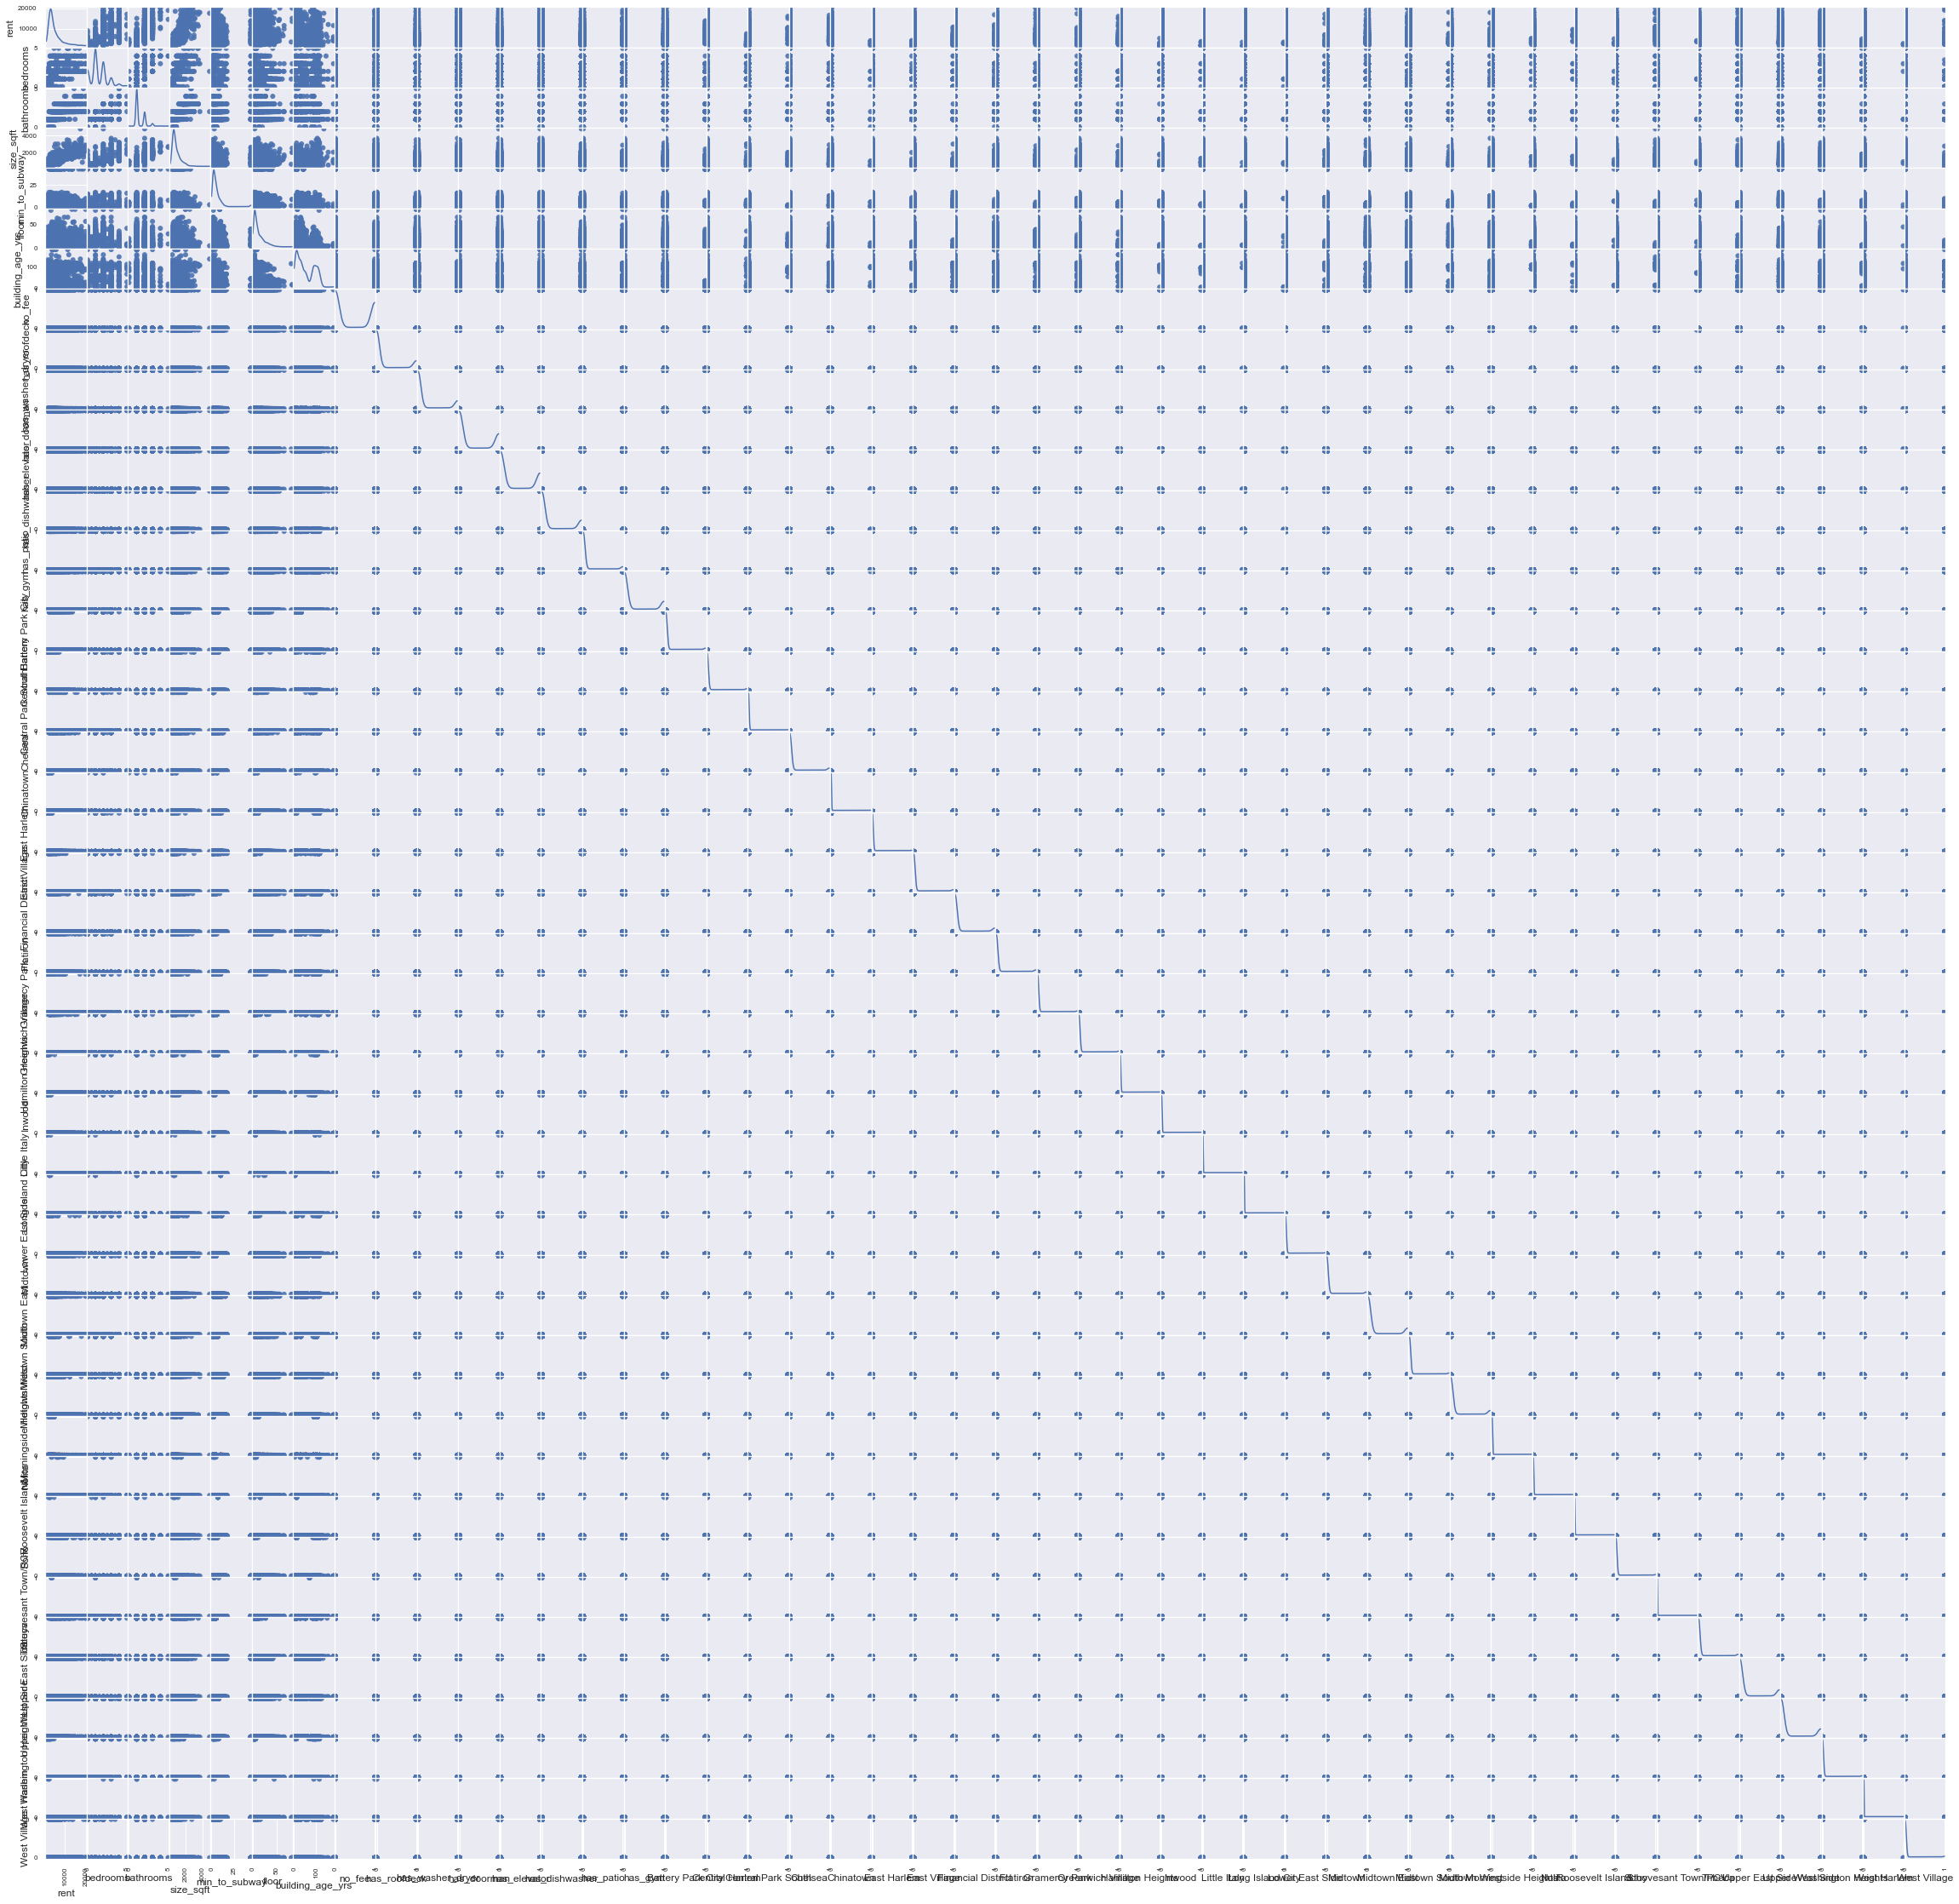

In [298]:
scatter_matrix (df, figsize = (40,40), alpha = 0.9, diagonal = "kde", marker = "o");

In [77]:
df_correlated = df[['rent', 'bedrooms', 'bathrooms', 'size_sqft']]

''

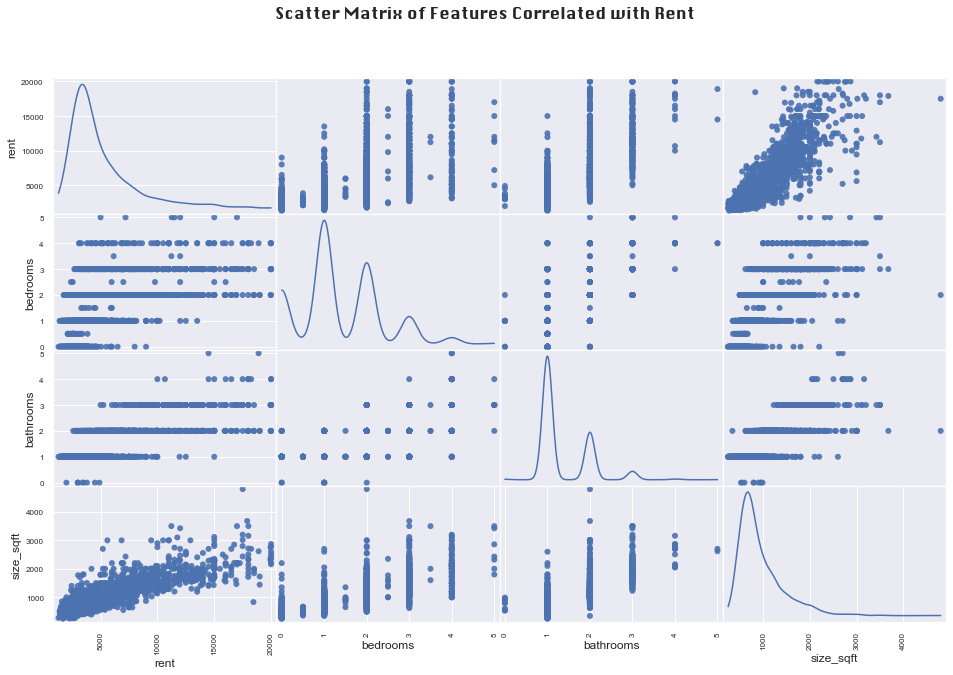

In [270]:
scatter_matrix(df_correlated, figsize = (16,10),
               alpha = 0.9, diagonal = "kde", marker = "o")

plt.suptitle('Scatter Matrix of Features Correlated with Rent', 
          fontsize=16,
          fontname='silom')
;

## No Multicollinearity

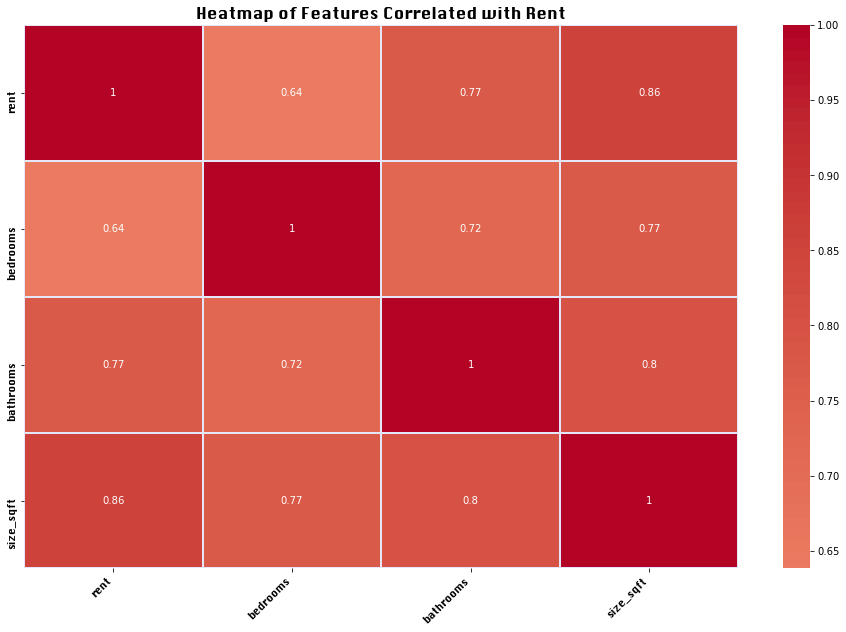

In [123]:
corr = df_correlated.corr()

plt.figure(figsize=(16,10))

plt.title('Heatmap of Features Correlated with Rent', 
          fontsize=16,
          fontname='silom'
)

ax = sns.heatmap(
    corr, 
    cmap='coolwarm',
    center=0, 
    linewidth=1,
    linecolor='lavender',
    annot = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    fontname='silom',    
    horizontalalignment='right')
    
ax.set_yticklabels(
    ax.get_xticklabels(),
    fontname='silom',    
    horizontalalignment='right'
);

# Building the Model

In [384]:
y = df.rent
x = np.array(df['size_sqft']).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [385]:
residuals = y - model.predict(x)

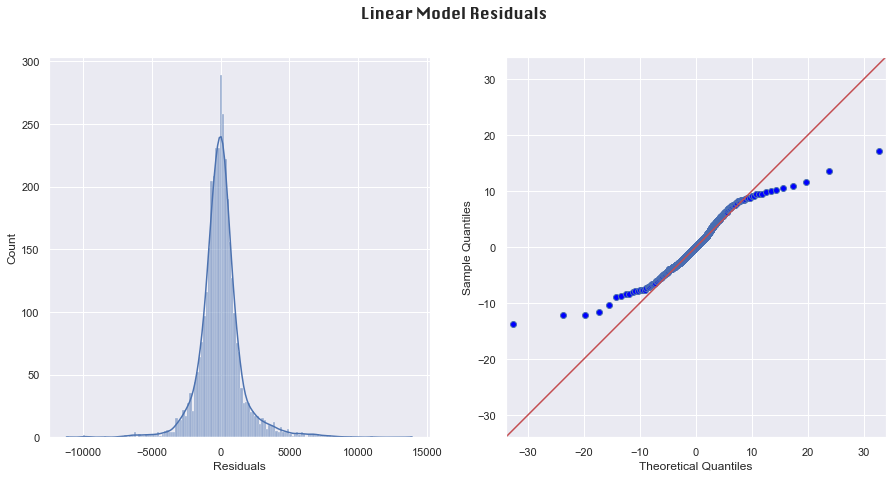

In [439]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
residuals = y - model.predict(x)
sns.histplot(residuals, ax=ax1, kde=True)
ax1.set(xlabel="Residuals")
sm.qqplot(residuals, stats.t, distargs=(4,), fit=True, line="45", ax=ax2);
plt.suptitle('Linear Model Residuals', fontname='silom', fontsize=15);

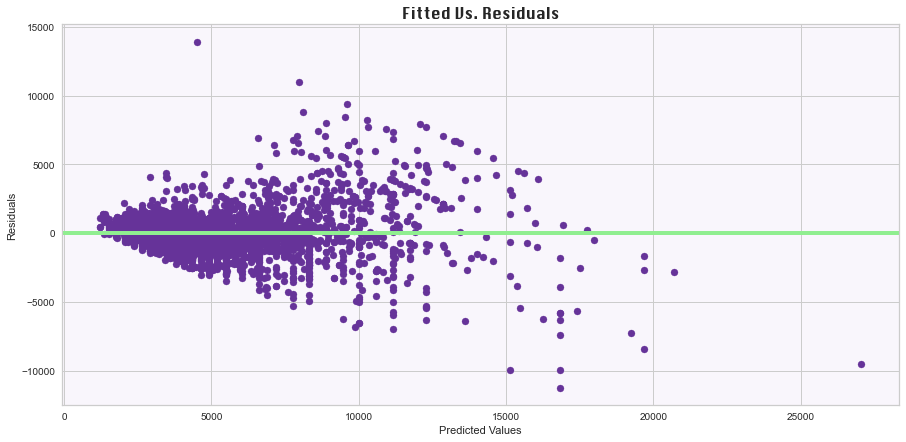

In [501]:
fig = plt.figure(figsize=(15,7))
plt.scatter(model.predict(x), residuals, color='rebeccapurple')
plt.axhline(y=0, color='lightgreen', linestyle='-', linewidth=4)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Fitted Vs. Residuals', fontname='silom', fontsize=15)
ax = plt.gca()
ax.set_facecolor('#f9f6fc')
plt.show()
plt.show()

# Scoring the Model

In [512]:
def predict_rent(sqft):
    return model.predict(np.array([sqft]).reshape(1, -1))

In [539]:
predict_rent(250)

array([1223.01174581])

In [536]:
predict_rent(500)

array([2642.3873802])

In [540]:
1223*2

2446

In [538]:
print('R-Squared:', round(model.score(x, y), 2))
print('Coefficient:', round(model.coef_[0], 2))
print('Intercept:', round(model.intercept_, 2))

R-Squared: 0.74
Coefficient: 5.68
Intercept: -196.36
